In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [2]:
# from pykrx import stock
# df = stock.get_index_ohlcv_by_date("20150101", "20201231", "1028")
# df = df.reset_index()
# print(df.head(2))
# df.to_csv("kospi.csv", index=False)


In [3]:
df = pd.read_csv("./datasets/kospi.csv")

In [4]:
df.head()

,날짜,시가,고가,저가,종가,거래량,거래대금
0,2015-01-02,243.96,245.32,243.25,244.79,54153879,2146860296567
1,2015-01-05,243.83,244.56,241.76,244.26,62845108,2622821317695
2,2015-01-06,241.36,242.06,239.32,239.93,66249937,2992594273218
3,2015-01-07,239.41,240.91,239.09,240.53,54599968,2610334705312
4,2015-01-08,242.28,244.13,241.68,243.94,64021136,3155894203006


In [5]:
df['날짜'].max(), df['날짜'].min()

('2020-12-30', '2015-01-02')

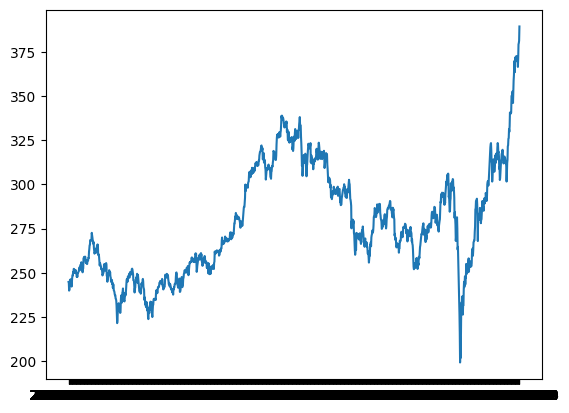

In [6]:
plt.plot(df['날짜'], df['종가'])
plt.show()

In [7]:
count = 0 
base_range = df[(df['날짜']>='2016-11-03') & (df['날짜']<='2016-11-15')]['종가'] 

# series에서 값만 추출 
compare_base = base_range.values 
print(compare_base)

# 표준화 
compare_base_norm = (compare_base - compare_base.mean()) / compare_base.std() 
# array -> 1차원 리스트로 변환 
compare_base_norm = list(compare_base_norm) 
# 검색 기간 
window_size = len(compare_base_norm) 
# 검색 기간에 더해서 추가로 보여줄 기간 
next_date = 5 
# 검색 횟수 
moving_cnt = len(df['종가']) - (window_size-1) - next_date 
# 유사도 저장 딕셔너리 

sim_dict = {} 
for i in range(moving_cnt): 
    compare_target_r = df[i:i+window_size]['종가'] 
    # series에서 값만 추출 
    compare_target = compare_target_r.values 
    
    # 표준화 
    compare_target_norm = (compare_target - compare_target.mean()) / compare_target.std() 
    # array -> 1차원 리스트로 변환 
    compare_target_norm = list(compare_target_norm) 
    # 코사인 유사도 저장 
    sim = cosine(compare_base_norm, compare_target_norm) 
    # 코사인 유사도 <- i(인덱스), 시계열데이터 함께 저장 
    sim_dict[sim] = [i,compare_target_r]


[252.9  252.57 254.6  255.26 249.67 255.31 251.99 250.01 249.2 ]


In [8]:
# 최소 코사인 유사도 
min_sim = min(list(sim_dict.keys())) 
# 최소 코사인 유사도가 나온 인덱스, 기간 추출 
sim_dict[min_sim]


[453,
 453    252.90
 454    252.57
 455    254.60
 456    255.26
 457    249.67
 458    255.31
 459    251.99
 460    250.01
 461    249.20
 Name: 종가, dtype: float64]

In [9]:
# 표준화된 데이터 
compare_base_norm

[0.22722516118555428,
 0.08019711571254858,
 0.9846423651373681,
 1.2786984560833667,
 -1.2118675263229097,
 1.3009754326701901,
 -0.17821581269453549,
 -1.0603840855325444,
 -1.4212711062390002]

In [10]:
# 검색 결과 유사 구간 데이터
compare_target = compare_target_r.values 
compare_target_norm = (compare_target - compare_target.mean())/compare_target.std() 
compare_target_norm = list(compare_target_norm) 
compare_target_norm


[-0.8706651433260317,
 0.6900066576532093,
 0.3202307605570794,
 -0.04954513653905051,
 0.847705202003008,
 0.5594975175016305,
 0.3147928797174354,
 0.6573793726153145,
 -2.4694021101828114]

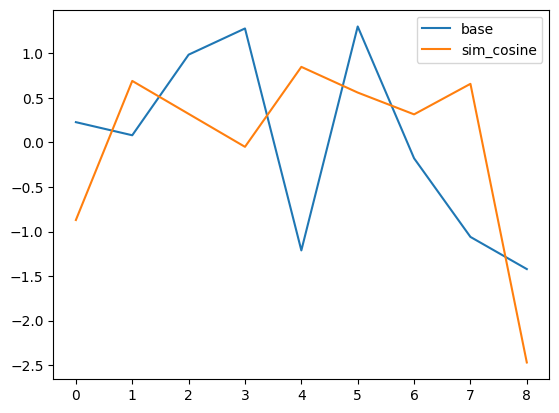

In [11]:
plt.plot(compare_base_norm, label='base') 
plt.plot(compare_target_norm, label='sim_cosine') 
plt.legend() 
plt.show()
